<a href="https://colab.research.google.com/github/melbaperez/03MAIR-Algoritmos-de-Optimizacion/blob/main/Trabajo_Pr%C3%A1ctico/Trabajo_Pr%C3%A1ctico_Algoritmos_Melba_Perez_Santana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
**Nombre y Apellidos:** Melba Pérez Santana  <br>
**Url:** https://github.com/melbaperez/03MAIR-Algoritmos-de-Optimizacion<br>
**Google Colab:** https://colab.research.google.com/drive/1_2L_GXN9sg5hH4rCwq5N1zJEAQv3C2i9?usp=sharing <br><br>
**Problema:**
>2. Organizar los horarios de partidos de La Liga<br>

**Descripción del problema:** <br>
Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la audiencia. Los horarios disponibles se conocen a priori y son los siguientes: <br>

|         |             |
|---------|-------------|
| Viernes | 20          |       
| Sábado  | 12,16,18,20 |           
| Domingo | 12,16,18,20 |            
| Lunes   | 20          |           


En primer lugar se clasifican los equipos en tres categorías según el numero de seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la categoría A, 11 equipos de categoría B y 6 equipos de categoría C. Se conoce estadísticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)

|                   | Categoría A | Categoría B   | Categoría C   |
|-------------------|-------------|---------------|---------------|
| Categoría A       | 2 millones  | 1,3 millones  | 1 millones    |
| Categoría B       |             | 0,9 millones  | 0,75 millones |
| Categoría C       |             |               | 0,47 millones |


Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla. Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes


|      | Viernes |  Sábado   | Domingo   | Lunes   |
|------|---------|-----------|-----------|---------|
| 12h  |         | 0,55      | 0,45      |         |
| 16h  |         | 0,7       | 0,75      |         |
| 18h  |         | 0,8       | 0,85      |         |
| 20h  |0,4      | 1         | 1         |0,4      |

Es posible la coincidencia de horarios pero en este caso la audiencia de cada partido se verá afectada y se estima que se reduce en porcentaje según la siguiente tabla dependiendo del número de coincidencias:

| Coincidencias| -%  |
|--------------|-----|
| 0            |  0% |
| 1            | 25% |
| 2            | 45% |
| 3            | 60% |
| 4            | 70% |
| 5            | 75% |
| 6            | 78% |
| 7            | 80% |
| 8            | 80% |




                                        

In [11]:
import matplotlib.pyplot as plt
import random
from random import shuffle
from itertools import combinations
random.seed(42)

#Modelo
- **¿Cómo represento el espacio de soluciones?** <br>
El espacio de soluciones se representará con una tupla en la que cada posición corresponderá a un partido y en cada posición se dará el slot del horario asociado a dicho partido. Por lo que, en nuestro caso, cada posición en la tupla corresponderá a los siguientes partidos:<br>
 0 - Celta-RealMadrid<br>
 1 - Valencia-RealSociedad<br>
 2 - Mallorca-Eibar<br>
 3 - Athletic-Barcelona<br>
 4 - Leganes-Osasuna<br>
 5 - Villareal-Granada<br>
 6 - Alaves-Levante<br>
 7 - Espanyol-Sevilla<br>
 8 - Betis-Valladolid<br>
 9- Atletico-Getafe<br><br>


- **¿Cuál es la función objetivo?** <br>
La función objetivo es la cantidad de audiencia en todos los partidos. Esta función se obtiene a partir de multiplicar el número de audiencia según las categorías de los equipos por coeficientes de reducción dependiendo del horario asignado. A esta multiplicación se le debe multiplicar por el porcentaje correspondiente debido al número de coincidencias en el mismo día y hora. Se calcula el número de audencia.<br><br>
Por lo tanto, la función objetivo es:<br>
      f(x1, ..., xn) = (1-c1)·x1·r1 + ... + (1-cn)·xn·rn
donde:<br>
x1, .., xn = audiencias de cada partido<br>
r1, .., rn = coeficientes de reducción de audienzas de los horarios<br>
c1, .., cn = porcentaje de reducción dependiendo del número de coincidencias<br><br>
En este caso, se trata de un problema de maximización, donde se debe obtener la máxima audiencia para la jornada de partidos.<br><br>


- **¿Cómo implemento las restricciones?** <br>
La restricción de este problema es que debe haber el slots de horario de los viernes a las 20:00 en un partido y los lunes a las 20:00 en otro partido. En este caso, cada vez que se crea un posible espacio de soluciones se tiene en cuenta que en la tupla aparezca al menos una vez V20 (viernes a las 20:00) y L20 (lunes a las 20:00).

In [12]:
dict_categoria_visualizaciones = {"AA":2, "AB":1.3, "AC":1, "BB":0.9, "BC":0.75, "CC":0.47}
dict_partidos_categorias = {"Celta-RealMadrid":"AB",
                                  "Valencia-RealSociedad":"AB",
                                  "Mallorca-Eibar":"CC",
                                  "Athletic-Barcelona":"AB",
                                  "Leganes-Osasuna":"CC",
                                  "Villareal-Granada":"BC",
                                  "Alaves-Levante":"BB",
                                  "Espanyol-Sevilla":"BB",
                                  "Betis-Valladolid":"BC",
                                  "Atletico-Getafe":"BB"}
dict_horarios_ponderaciones = {"V20": 0.4, "S12":0.55, "S16":0.7, "S18":0.8, "S20":1, "D12":0.45, "D16":0.75, "D18":0.85, "D20":1, "L20": 0.4}
lista_reduccion_coincidencias = [0, 0.25, 0.45, 0.60, 0.70, 0.75, 0.78, 0.80, 0.80]

opciones_horarios = ['V20', 'S12', 'S16', 'S18', 'S20', 'D12', 'D16', 'D18', 'D20', 'L20']
partidos = ["Celta-RealMadrid", "Valencia-RealSociedad", "Mallorca-Eibar", "Athletic-Barcelona", "Leganes-Osasuna", "Villareal-Granada", "Alaves-Levante", "Espanyol-Sevilla", "Betis-Valladolid", "Atletico-Getafe"]
num_horarios_restricciones = 2


In [13]:
def calcular_visualizaciones(base_audiencia, ponderacion, num_coincidencias):
    return base_audiencia*ponderacion*(1-lista_reduccion_coincidencias[num_coincidencias])

def obtener_base_audiencia(partido):
    return dict_categoria_visualizaciones.get(dict_partidos_categorias.get(partido))

def calcular_visualizaciones_de_horario(horarios_partidos):
    suma_audiencia = 0
    coincidencias = {horario:horarios_partidos.count(horario)-1 for horario in horarios_partidos}
    for i in range(len(horarios_partidos)):
        suma_audiencia += calcular_visualizaciones(obtener_base_audiencia(partidos[i]), dict_horarios_ponderaciones.get(horarios_partidos[i]), coincidencias.get(horarios_partidos[i]))
    return round(suma_audiencia, 3)

#Análisis
- **¿Que complejidad tiene el problema? Orden de complejidad y contabilizar el espacio de soluciones** <br>
El orden de complejidad del problema es de O(n^10).<br><br>
El espacio de soluciones sin restricciones es 10000000000. Habiendo X partidos e Y slots de horarios, sería una variación con repetición porque se pueden repetir los slots de los horarios para cada partido. Además, el orden importa e intervienen todos los elementos. Por lo tanto, la fórmula es Y^X = 10^10.<br><br>
Sin embargo, teniendo en cuenta las restricciones. Al tener dos slots que necesariamente deben tener como mínimo un partido asignado cada uno, podemos calcular el espacio de soluciones por separado de estos dos slots de los otros 8.<br><br>
Por lo que partimos de Y^X = 8^8 = 16777216. Estos son todas las variaciones con repetición de los partidos en los 8 horarios. En cambio, para los otros dos slots, será también una variación con repetición, pero con solamente dos posiciones posibles 2^2 = 4 <br>
Si multiplicamos estos dos valores daría 67108864.




#Diseño
- **¿Qué técnica utilizo? ¿Por qué?** <br>
Utilizaré algoritmos genéticos, ya que nos encontramos con un espacio de soluciones grande y complejo. Asimismo, al explotar constantemente las mejores soluciones y variar las soluciones con la diversidad genética, evitamos quedar atrapados en óptimos locales.

In [14]:
def generar_individuo(num_partidos):
    individuo = opciones_horarios.copy()
    shuffle(individuo)
    if (len(individuo) < num_partidos):
        for x in range(num_partidos-len(individuo)):
            indice_aleatorio = random.randint(0, len(opciones_horarios) - 1)
            individuo.append(opciones_horarios[indice_aleatorio])
    elif (len(individuo) > num_partidos):
        while len(individuo) != num_partidos:
            indice_aleatorio = random.randint(0, len(individuo) - 1)
            if (individuo[indice_aleatorio] != 'V20' and individuo[indice_aleatorio] != 'L20') or (num_partidos < num_horarios_restricciones and len(individuo) == num_horarios_restricciones):
                individuo.pop(indice_aleatorio)
    return individuo

def generar_poblacion(num_partidos, num_individuos):
  dict_individuos = {}
  for i in range(num_individuos):
    dict_individuos[tuple(generar_individuo(num_partidos))] = 0
  return dict_individuos

In [15]:
# Evalúa la población y devuelve el mejor individuo, en este caso, para optimizar el algoritmo, si hay valores del diccionario
# inicializado a 0 entonces se calcula el número de audiencia para cada posible solución de horarios.
def evaluar_poblacion(dict_poblacion):
  mejor_horario = float("-inf")
  mejor_numero_audiencia = float("-inf")
  for clave in dict_poblacion:
    if dict_poblacion[clave] == 0:
      dict_poblacion[clave] = calcular_visualizaciones_de_horario(clave)
    if dict_poblacion[clave] > mejor_numero_audiencia:
      mejor_numero_audiencia = dict_poblacion[clave]
      mejor_horario = clave

  return mejor_horario, mejor_numero_audiencia, dict_poblacion

In [16]:
# Funcion de mutación. Para evitar que haya más de una vez L20 o V20, que son los slots de horario con más bajo número de audencia, se cambian todos
# los horarios de los partidos hasta que solo haya uno de cada uno y si de primeras hay uno de cada pues se intercambian dos horarios aleatoriamente.
def mutar(individuo, porcentaje_mutacion, num_partidos):
  mutacion = random.randint(0, 100)
  if mutacion <= porcentaje_mutacion * 100:
    individuo_lista = list(individuo)
    multiples_l20 = False
    multiples_v20 = False
    while individuo_lista.count("L20") > 1:
      multiples_l20 = True
      indice_aleatorio = random.randint(0, num_partidos-1)
      individuo_lista[individuo_lista.index("L20")] = opciones_horarios[indice_aleatorio]
    while individuo_lista.count("V20") > 1:
      multiples_v20 = True
      indice_aleatorio = random.randint(0, num_partidos-1)
      individuo_lista[individuo_lista.index("V20")] = opciones_horarios[indice_aleatorio]
    if not multiples_l20 and not multiples_v20:
      indice_1 = random.randint(0, num_partidos-1)
      indice_2 = random.randint(0, num_partidos-1)
      indice_aleatorio = random.randint(0, num_partidos-1)
      individuo_1 = individuo_lista[indice_1]
      individuo_lista[indice_1] = individuo_lista[indice_2]
      individuo_lista[indice_2] = individuo_1
    return tuple(individuo_lista)
  return individuo

In [17]:
# Función para generar hijos a partir de 2 padres. El método utilizado es el n-point crossover, en este caso se hacen 4 particiones.
def descendencia(padres, porcentaje_mutacion, num_partidos):
    madre = padres[0]
    padre = padres[1]
    indices = []
    indices.append(madre.index('V20'))
    indices.append(madre.index('L20'))
    indices = sorted(indices)

    hijo = padre[:indices[0]//2] + madre[indices[0]//2:indices[0]+1] + padre[indices[0]+1:indices[0]+1+(indices[1]-indices[0])//2] + madre[indices[0]+1+(indices[1]-indices[0])//2:]
    return mutar(hijo, porcentaje_mutacion, num_partidos)


In [18]:
# Función de cruce. Se cogen la mitad los individuos de la población con mejores números de audiencia, se crean todas las
# combinaciones posibles de pares de elementos de esta lista de mejores individuos y se generan sus hijos. A estos hijos
# al añadirlos a la población se les calcula el número de visualizaciones para optimizar el rendimiento.
def cruzar(poblacion, porcentaje_mutacion, num_individuos, num_partidos):
  poblacion_a_cruzar = sorted(poblacion, key=lambda x: poblacion[x], reverse=True)[:num_individuos//2]
  pares_padres = list(combinations(poblacion_a_cruzar, 2))
  for padres in pares_padres:
    nuevo_hijo = descendencia(padres, porcentaje_mutacion, num_partidos)
    poblacion[nuevo_hijo] = calcular_visualizaciones_de_horario(list(nuevo_hijo))
  return poblacion

In [19]:
# Función de selección de la población. Se escogen los individuos con los mejores números de audiencia.
def seleccionar(poblacion, num_individuos):
  return dict(sorted(poblacion.items(), key=lambda x: x[1], reverse=True)[:num_individuos])

Generacion # 1 
El mejor horario es: ('D18', 'S18', 'S16', 'D20', 'D12', 'D16', 'L20', 'S20', 'V20', 'S12') 
con número de audiencia  6.603 

Generacion # 2 
El mejor horario es: ('S18', 'S20', 'L20', 'D20', 'D12', 'D16', 'D20', 'D18', 'V20', 'S16') 
con número de audiencia  6.647 

Generacion # 3 
El mejor horario es: ('S18', 'S20', 'S12', 'D20', 'L20', 'D16', 'D20', 'D18', 'V20', 'S16') 
con número de audiencia  6.694 

Generacion # 4 
El mejor horario es: ('S18', 'S20', 'S12', 'D20', 'L20', 'D16', 'D12', 'D18', 'V20', 'S16') 
con número de audiencia  6.749 

Generacion # 5 
El mejor horario es: ('S18', 'S20', 'S12', 'D20', 'L20', 'D16', 'D12', 'D18', 'V20', 'S16') 
con número de audiencia  6.749 

Generacion # 6 
El mejor horario es: ('S18', 'S20', 'S12', 'D20', 'L20', 'D16', 'D12', 'D18', 'V20', 'S16') 
con número de audiencia  6.749 

Generacion # 7 
El mejor horario es: ('S18', 'S20', 'S12', 'D20', 'L20', 'D16', 'D12', 'D18', 'V20', 'S16') 
con número de audiencia  6.749 

Genera

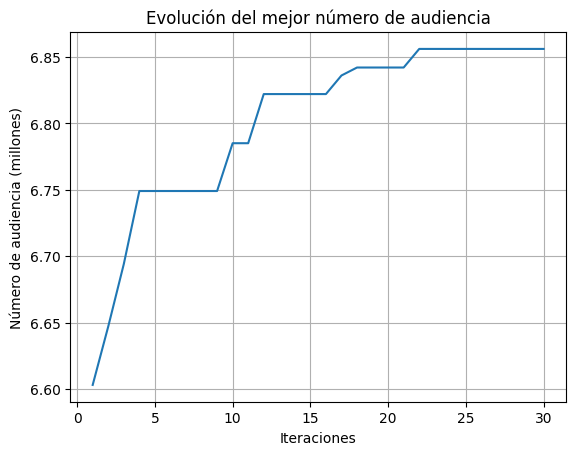

In [20]:
def algoritmo_genetico(partidos, num_individuos, mutacion, generaciones):
  # partidos => datos del problema
  # num_individuos => tamaño de la población
  # mutacion => probabilidad de una mutación
  # generaciones => número de generaciones a generar para finalizar

  # Genera la población inicial
  poblacion = generar_poblacion(len(partidos), num_individuos)

  # Inicializamos valores para la mejor solución
  previo_mejor_horario, previo_mejor_numero_audiencia, poblacion_evaluada = evaluar_poblacion(poblacion)

  # Condición de parada
  stop = False
  n = 1

  mejores_soluciones = []

  while(stop == False) :

    # Cruce
    poblacion_evaluada = cruzar(poblacion_evaluada, mutacion, num_individuos, len(partidos))

    # Selección
    poblacion_evaluada = seleccionar(poblacion_evaluada, num_individuos)

    # Evaluación
    mejor_horario, mejor_numero_audiencia, poblacion_evaluada = evaluar_poblacion(poblacion_evaluada)

    print("Generacion #", n, "\nEl mejor horario es:" , mejor_horario, "\ncon número de audiencia " , mejor_numero_audiencia, "\n")
    mejores_soluciones.append(mejor_numero_audiencia)

    # Criterio de parada
    if n==generaciones:
      stop = True

    n += 1

  iteraciones = list(range(1, generaciones+1))
  plt.plot(iteraciones, mejores_soluciones, linestyle='-')
  plt.title('Evolución del mejor número de audiencia')
  plt.xlabel('Iteraciones')
  plt.ylabel('Número de audiencia (millones)')
  plt.grid(True)
  plt.show()

  return mejor_horario


solucion = algoritmo_genetico(partidos, num_individuos=25, mutacion=.7, generaciones=30)